Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import os
from torch import nn
from torch.utils.data import DataLoader
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from functions import *

## Visualizing the functions

### 0) Function 0

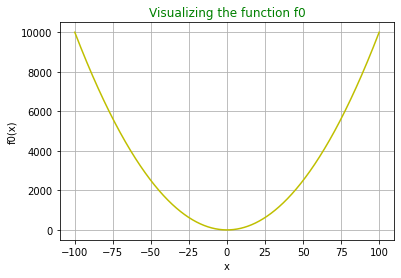

In [2]:
x0=np.linspace(-10**(2), 10**(2), 10**(4))
f0_array= f0(x0)
plt.plot(x0, f0_array, color='y')
plt.xlabel('x')
plt.ylabel('f0(x)')
plt.title('Visualizing the function f0', color='g')
plt. grid()
plt.savefig('figures/f0_plot')
plt.show()

### 1) Function 1

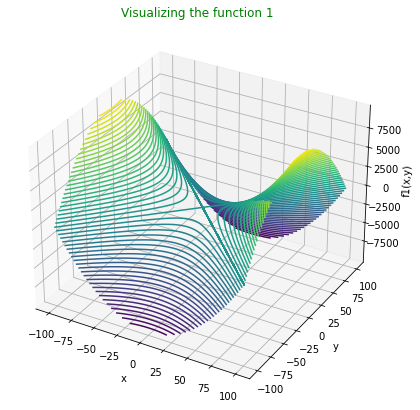

In [3]:
x1=np.linspace(-10**(2), 10**(2), 10**(4))
y1=np.linspace(-10**(2), 10**(2), 10**(4))
X1, Y1 = np.meshgrid(x1, y1)
Z1 = f1(X1, Y1)
fig = plt.figure(figsize =[10,7])
ax = plt.axes(projection='3d')
ax.contour3D(X1, Y1, Z1, 50, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f1(x,y)')
ax.set_title('Visualizing the function 1', color='g')
plt.savefig('figures/f1_plot')
plt.show()

### 2) Function 2

In [4]:
x2=np.linspace(-4, 4, 10**(4))
y2=np.linspace(-4, 4, 10**(4))
X2, Y2 = np.meshgrid(x2, y2)
Z2 = f2(X2, Y2)
fig = plt.figure(figsize =[10,7])
ax = plt.axes(projection='3d')
ax.contour3D(X2, Y2, Z2, 50, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f2(x,y)')
ax.set_title('Visualizing the function f2', color='g')
plt.savefig('figures/f2_plot')
plt.show()

## 3) Function 3

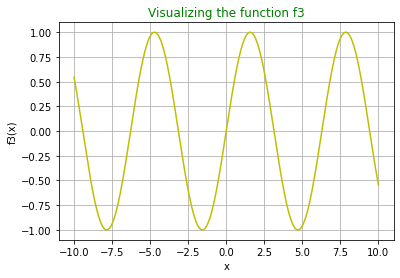

In [ ]:
x3=np.linspace(-10**(1), 10**(1), 10**(4))
f3_array= f3(x3)
plt.plot(x3, f3_array, color='y')
plt.xlabel('x')
plt.ylabel('f3(x)')
plt.title('Visualizing the function f3', color='g')
plt. grid()
plt.savefig('figures/f3_plot')
plt.show()

## 4) Function 4

Regarding this function, it is only visualized in 2d and 3d. More than that it gets complicated.

#### 2D visualization 

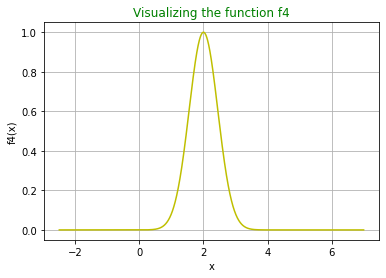

In [ ]:
x4=np.linspace(-2.5, 7, 10**(4))
f4_array= f4(x4)
plt.plot(x4, f4_array, color='y')
plt.xlabel('x')
plt.ylabel('f4(x)')
plt.title('Visualizing the function f4', color='g')
plt. grid()
plt.savefig('figures/f4_plot_2D')
plt.show()

#### 3D visualisation 

TypeError: ufunc 'bitwise_and' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

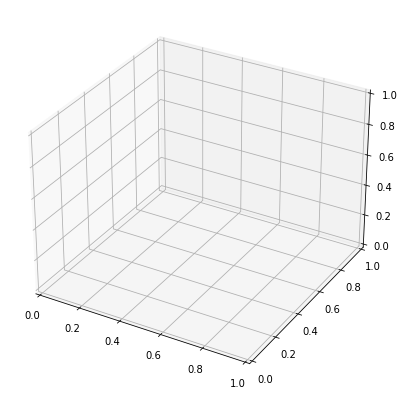

In [ ]:
x4=np.linspace(-2.5, 7, 10**(4))
y4=np.linspace(-2.5, 7, 10**(4))
X4, Y4 = np.meshgrid(x4, y4)
Z4 = f4(np.concatenate((X4, Y4), axis=0))
fig = plt.figure(figsize =[10,7])
ax = plt.axes(projection='3d')
ax.contour3D(X4, Y4,Z4,  50, cmap='viridis')
#ax.contour3D(X4, Y4,f4(Y4),  50, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f4(x,y)')
ax.set_title('Visualizing the function f4', color='g')
plt.savefig('figures/f4_plot_3D')
plt.show()

In [ ]:
np.linalg.norm([1, 2, 2])

3.0

Now that we have a dataset ready to be explored, we implement our Neural Network

Try f1 approximation using 1 layer with 2 neurons 

In [ ]:
# defining NN architecture
class NN1(nn.Module):
    def __init__(self, input_features=2, h1=3):
        super().__init__()
        self.layer1=nn.Linear(input_features, 2)
        self.output=nn.Linear(2,1)
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x=self.output(x)
        return x

Creating our Model

In [ ]:
torch.manual_seed(123)
model_1_f1=NN1()

Importing our data

In [ ]:
Data_f1=pd.read_csv('./datasets/f1_dataset.csv')

In [ ]:
Data_f1.head()

,Unnamed: 0,x,y,"f1(x,y)"
0,0,-60.116012,-100.000000,-6386.065149
1,1,-36.913691,-99.979998,-8633.379390
2,2,26.892689,-99.959996,-9268.784064
3,3,45.334533,-99.939994,-7932.782477
4,4,9.670967,-99.919992,-9890.477197


Loading the data

In [ ]:
Input_data=Data_f1[['x','y']].to_numpy()
f1_data=Data_f1['f1(x,y)'].to_numpy()

Input_train and Input_test represent the variables (x, y), respectively for training and testing. While f1_train and f1_test are the labels for respectively the training and testing.

In [ ]:
Input_train, Input_test,f1_train ,f1_test = train_test_split(Input_data, f1_data , test_size=0.33, random_state=42)

Transform our feautures an labels into Tensors 

In [ ]:
Input_data=torch.FloatTensor(Input_data)
f1_data=torch.FloatTensor(f1_data)

Input_train=torch.FloatTensor(Input_train)
f1_train=torch.FloatTensor(f1_train)
Input_test=torch.FloatTensor(Input_test)
f1_test=torch.FloatTensor(f1_test)

Our criterion is the loss function. And the optimizer is the decent methode

In [ ]:
criterion= nn.MSELoss()
optimizer=torch.optim.Adam(model_1_f1.parameters(), lr=10**(2))

In [ ]:
from tqdm import tqdm

In [ ]:
# train
epochs = 100
loss_array=[]

for e in tqdm(range(epochs)):
    
    # forward pass
    output = model_1_f1(Input_data)

    # compute the loss
    loss = criterion(output, f1_data)


    optimizer.zero_grad() # clear previous gradients
    loss.backward() # backward pass
    optimizer.step()

    loss_array+=[loss.item()]


100%|██████████| 100/100 [00:18<00:00,  5.53it/s]


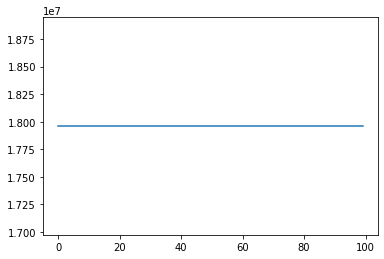

In [ ]:
plt.plot(range(len(loss_array)), loss_array)


In [ ]:
loss_array[-1]/loss_array[0]

0.99661562901301

In [ ]:
with torch.no_grad():
    f1_eval=[]
    for i in Input_train:

        f1_eval.append(model_1_f1.forward(i).item())
print(set(f1_eval))

{28.039342880249023}


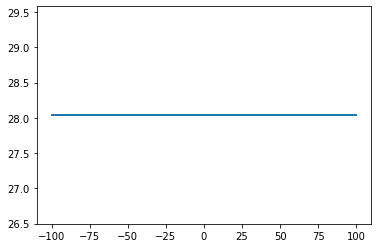

In [ ]:
plt.plot(Input_train[:,1], f1_eval)